In [59]:
import pandas as pd
import numpy as np
# import pandas as pd
import warnings
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score
from sklearn.model_selection import RepeatedStratifiedKFold,RandomizedSearchCV
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('data/Phishing_Legitimate_full.csv')
df.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [3]:
df.drop('id',axis=1,inplace=True)

In [4]:
df.head()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,3,1,5,72,0,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,3,1,3,144,0,0,0,0,2,0,...,0,0,0,1,-1,1,1,1,1,1
2,3,1,2,58,0,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,3,1,6,79,1,0,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,3,0,4,46,0,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [5]:
# Dependent and independent differentiate
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [6]:
y.value_counts()

CLASS_LABEL
1    5000
0    5000
Name: count, dtype: int64

In [7]:
X.shape

(10000, 48)

In [8]:
y.shape

(10000,)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression  # Example model
import numpy as np

# Define the range of k values to test
k_values = [10, 15, 20, 25,30,35,40,45,48]

# Dictionary to store cross-validation results for each k
cv_results = {}

for k in k_values:
    # Apply SelectKBest with each k value
    selector = SelectKBest(mutual_info_classif, k=k)
    X_train_selected = selector.fit_transform(X_train, y_train)
    
    # Initialize the model (replace LogisticRegression with other models as needed)
    model = LogisticRegression()
    
    # Perform cross-validation and get the average score
    cv_score = cross_val_score(model, X_train_selected, y_train, cv=5).mean()
    cv_results[k] = cv_score  # Store the score for each k value

# Print results
for k, score in cv_results.items():
    print(f"Average CV accuracy with top {k} features: {score:.4f}")


Average CV accuracy with top 10 features: 0.8789
Average CV accuracy with top 15 features: 0.9096
Average CV accuracy with top 20 features: 0.9180
Average CV accuracy with top 25 features: 0.9225
Average CV accuracy with top 30 features: 0.9226
Average CV accuracy with top 35 features: 0.9258
Average CV accuracy with top 40 features: 0.9233
Average CV accuracy with top 45 features: 0.9326
Average CV accuracy with top 48 features: 0.9364


In [18]:
optimal_k = max(cv_results, key=cv_results.get)
print(optimal_k)

48


In [11]:
# Feature Selection
from sklearn.feature_selection import mutual_info_classif

In [12]:
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.06265409, 0.00093319, 0.05466198, 0.04138318, 0.11907923,
       0.01877131, 0.00178275, 0.00932883, 0.01465704, 0.        ,
       0.03038784, 0.02218315, 0.        , 0.12472067, 0.01900402,
       0.00802044, 0.01420776, 0.00853653, 0.01272628, 0.00953704,
       0.01949565, 0.05375146, 0.04561913, 0.00976351, 0.04595509,
       0.01473229, 0.46465583, 0.29894721, 0.00648028, 0.05981247,
       0.        , 0.01121378, 0.01020872, 0.23625863, 0.12519842,
       0.        , 0.00642131, 0.00465084, 0.07246508, 0.02277229,
       0.00516044, 0.        , 0.00282908, 0.01535332, 0.02649781,
       0.02182492, 0.12175451, 0.21537659])

In [19]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

PctExtHyperlinks                      0.463727
PctExtResourceUrls                    0.288622
PctNullSelfRedirectHyperlinks         0.226308
PctExtNullSelfRedirectHyperlinksRT    0.210308
FrequentDomainNameMismatch            0.127054
ExtMetaScriptLinkRT                   0.125461
NumNumericChars                       0.117018
NumDash                               0.107387
SubmitInfoToEmail                     0.083227
PathLevel                             0.062875
NumDots                               0.061370
PathLength                            0.060174
InsecureForms                         0.058329
QueryLength                           0.055331
UrlLength                             0.044092
NumQueryComponents                    0.043705
NumSensitiveWords                     0.041440
NumAmpersand                          0.030822
IframeOrFrame                         0.030733
HostnameLength                        0.029018
PctExtResourceUrlsRT                  0.027673
UrlLengthRT  

<Axes: >

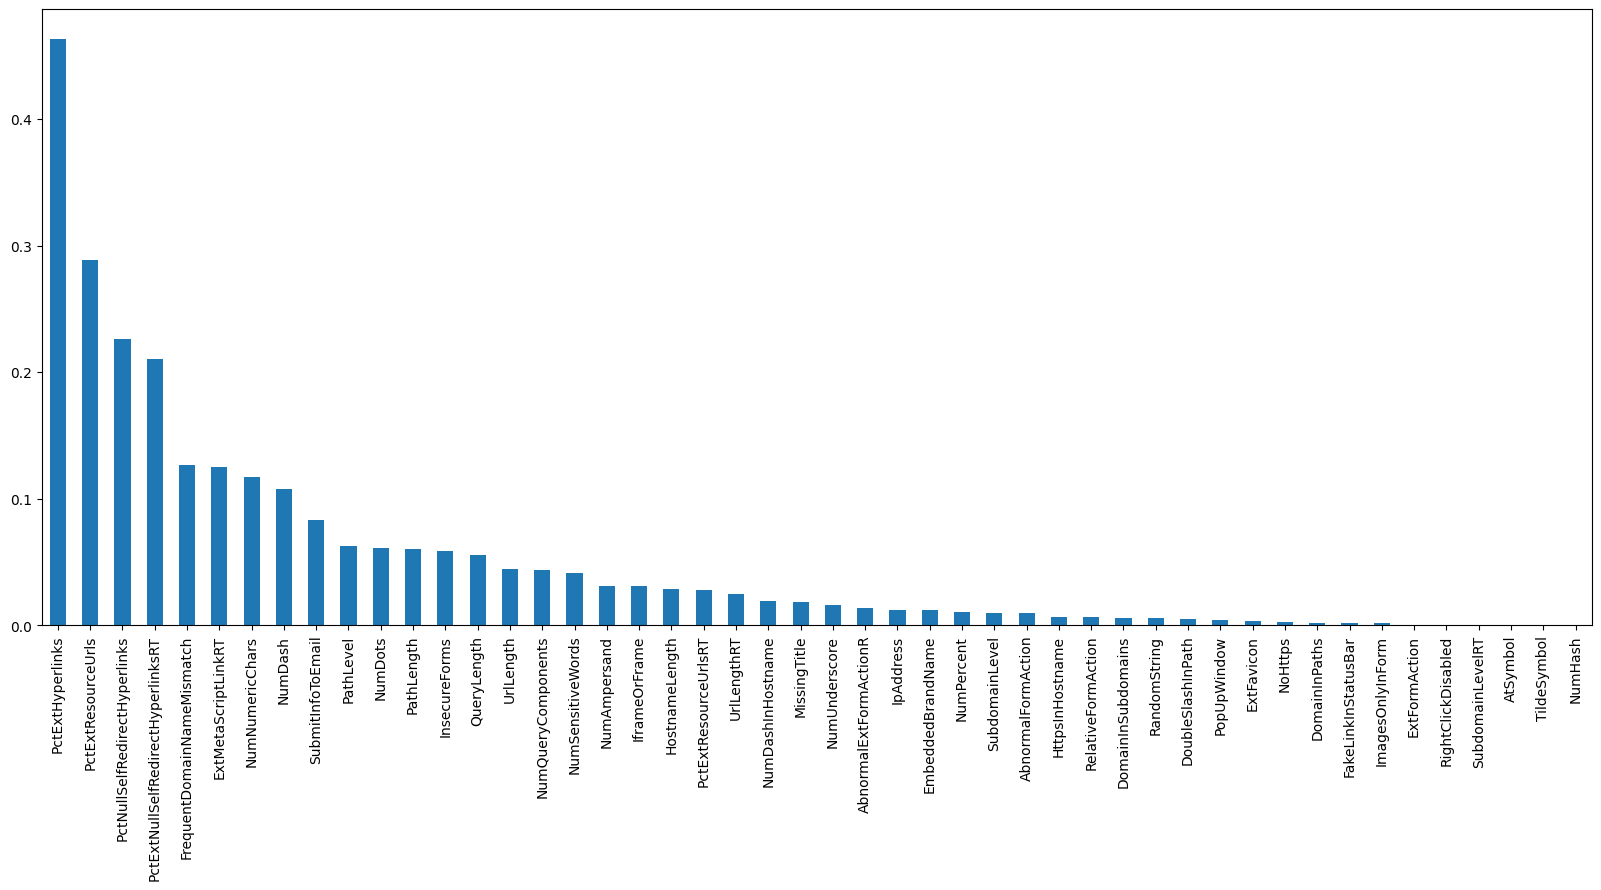

In [20]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [19]:
from sklearn.feature_selection import SelectKBest

In [20]:
#No we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=20)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]
X_test.columns[sel_five_cols.get_support()]

Index(['NumDots', 'PathLevel', 'UrlLength', 'NumDash', 'NumQueryComponents',
       'NumNumericChars', 'HostnameLength', 'PathLength', 'QueryLength',
       'NumSensitiveWords', 'PctExtHyperlinks', 'PctExtResourceUrls',
       'InsecureForms', 'PctNullSelfRedirectHyperlinks',
       'FrequentDomainNameMismatch', 'SubmitInfoToEmail',
       'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT',
       'PctExtNullSelfRedirectHyperlinksRT'],
      dtype='object')

In [21]:
X_train=X_train[X_train.columns[sel_five_cols.get_support()]]
X_test=X_test[X_test.columns[sel_five_cols.get_support()]]

In [24]:
from sklearn.preprocessing import StandardScaler
# Initialize the scaler
scaler = StandardScaler()

# Fit on the training data and transform it
X_train = scaler.fit_transform(X_train)

# Transform the test data without refitting
X_test = scaler.transform(X_test)

In [25]:
# first logistic regression
from sklearn.linear_model import LogisticRegressionCV,LogisticRegression
lr=LogisticRegression(max_iter=10000)
lrc=LogisticRegressionCV(max_iter=10000)

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
lr.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [28]:
y_pred=lr.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score,precision_score,classification_report,confusion_matrix

In [30]:
accuracy_score(y_test,y_pred)

0.9365

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       988
           1       0.94      0.94      0.94      1012

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



In [32]:
lrc.fit(X_train,y_train)

LogisticRegressionCV(max_iter=10000)

In [33]:
y_pred=lrc.predict(X_test)

In [34]:
accuracy_score(y_test,y_pred)

0.9375

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
dt=DecisionTreeClassifier()

In [37]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [38]:
dt_pred=dt.predict(X_test)

In [39]:
accuracy_score(y_test,dt_pred)

0.9665

In [40]:
dt_hyper=DecisionTreeClassifier()

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
# Define the hyperparameter grid for pruning
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_leaf_nodes': [None, 10, 20],
    'ccp_alpha': [0.0, 0.01, 0.1]
}




In [43]:
# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(dt_hyper, param_grid, cv=5, scoring='accuracy')


In [44]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.0, 0.01, 0.1],
                         'max_depth': [3, 5, 7, 10],
                         'max_leaf_nodes': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [45]:
grid_search.best_params_

{'ccp_alpha': 0.0,
 'max_depth': 7,
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [46]:
dt_pred_hpt=grid_search.predict(X_test)

In [47]:
accuracy_score(y_test,dt_pred_hpt)

0.965

In [48]:
print(classification_report(y_test,dt_pred_hpt))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       988
           1       0.96      0.97      0.97      1012

    accuracy                           0.96      2000
   macro avg       0.97      0.96      0.96      2000
weighted avg       0.97      0.96      0.96      2000



## Model 3:- Support Vector Machine

In [49]:
from sklearn.svm import SVC
svc_model=SVC()

In [50]:
svc_model.fit(X_train,y_train)

SVC()

In [52]:
svc_pred=svc_model.predict(X_test)

In [53]:
print(f"Accuracy : {accuracy_score(y_test,svc_pred)}")

Accuracy : 0.958


In [54]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       988
           1       0.96      0.95      0.96      1012

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000



In [56]:
print(confusion_matrix(y_test,svc_pred))

[[952  36]
 [ 48 964]]


In [57]:
print(precision_score(y_test,svc_pred))

0.964


### SVC: Cross-Validation & Hyperparameter tunning

In [60]:
param_grid = {'C': np.arange(0.1, 10, 0.1),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'degree': np.arange(2, 6, 1)}
# Initialize the model
svc_hyper = SVC(random_state=0, probability=True)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

random_search = RandomizedSearchCV(svc_hyper, param_grid, n_iter=10, cv=rskf, n_jobs=-1)

random_search.fit(X_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'kernel': 'rbf', 'degree': 4, 'C': 8.9}


In [62]:
svc_model_2=SVC(
    C=best_params['C'],
    kernel=best_params['kernel'],
    degree=best_params['degree'],
    random_state=0,
    probability=True
)

In [63]:
svc_model_2.fit(X_train,y_train)

SVC(C=8.9, degree=4, probability=True, random_state=0)

In [64]:
svc_pred_2=svc_model_2.predict(X_test)

In [65]:
print(f"Accuracy : {accuracy_score(y_test,svc_pred_2)}")

Accuracy : 0.9655


In [66]:
print(classification_report(y_test,svc_pred_2))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       988
           1       0.97      0.96      0.97      1012

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



In [67]:
print(confusion_matrix(y_test,svc_pred_2))

[[959  29]
 [ 40 972]]


In [68]:
print(precision_score(y_test,svc_pred_2))

0.971028971028971


### Model-4 : Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=0)

In [71]:
# model training 
rfc.fit(X_train,y_train)


RandomForestClassifier(random_state=0)

In [72]:
# prediction
rfc_pred=rfc.predict(X_test)

In [73]:
print('Accuracy',accuracy_score(y_test,rfc_pred))

Accuracy 0.979


In [80]:
precision_score(y_test,rfc_pred)

0.9792490118577075

### 2- Cross validation and hyperparameter tunning

In [74]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
grid = {'n_estimators': [10, 50, 100, 200],
              'max_depth': [8, 9, 10, 11, 12,13, 14, 15],
              'min_samples_split': [2, 3, 4, 5]}

# Initialize the model
rf = RandomForestClassifier(random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomSearchCV
random_search = RandomizedSearchCV(rf, grid,cv=rskf, n_iter=10, n_jobs=-1)

# Fit the RandomSearchCV to the training data
random_search.fit(X_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'n_estimators': 200, 'min_samples_split': 5, 'max_depth': 13}


In [75]:
rfc_model_2= RandomForestClassifier(n_estimators = best_params['n_estimators'],
                                 min_samples_leaf= best_params['min_samples_split'],
                                 max_depth = best_params['max_depth'],
                                 random_state=0)

In [76]:
rfc_model_2.fit(X_train,y_train)

RandomForestClassifier(max_depth=13, min_samples_leaf=5, n_estimators=200,
                       random_state=0)

In [77]:
rfc_pred_2=rfc_model_2.predict(X_test)

In [78]:
accuracy_score(y_test,rfc_pred_2)

0.974

In [79]:
precision_score(y_test,rfc_pred_2)

0.9733727810650887

In [81]:
import xgboost as xg
xgc=xg.XGBClassifier()

In [82]:
# model training
xgc.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [83]:
xgc_pred=xgc.predict(X_test)

In [85]:
accuracy_score(y_test,xgc_pred)

0.984

### Cross Validation and hyperparameter tunning

In [87]:
# ML Model - 5 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'learning_rate': np.arange(0.01, 0.3, 0.01),
              'max_depth': np.arange(3, 15, 1),
              'n_estimators': np.arange(100, 200, 10)}

# Initialize the model
xgb2 = xg.XGBClassifier(random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(xgb2, param_grid, n_iter=10, cv=rskf)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'n_estimators': 130, 'max_depth': 7, 'learning_rate': 0.27}


In [88]:

# Initialize model with best parameters
xgb_model2 = xg.XGBClassifier(learning_rate = best_params['learning_rate'],
                                 max_depth = best_params['max_depth'],
                               n_estimators = best_params['n_estimators'],
                                 random_state=0)


In [89]:
xgb_model2.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.27, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=130, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [90]:
xgc_pred_2=xgb_model2.predict(X_test)

In [91]:
accuracy_score(y_test,xgc_pred_2)

0.9825

### Model-6: Naive Bayes

In [92]:
from sklearn.naive_bayes import GaussianNB
gn=GaussianNB()

In [93]:
# model training 
gn.fit(X_train,y_train)

GaussianNB()

In [94]:
gn_pred=gn.predict(X_test)

In [95]:
# accuray of model
accuracy_score(y_test,gn_pred)

0.8465

### cross validation and hyper parameter tunning

In [96]:


# ML Model - 6 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

# Initialize the model
naive = GaussianNB()

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=4, n_repeats=4, random_state=0)

# Initialize GridSearchCV
GridSearch = GridSearchCV(naive, param_grid, cv=rskf, n_jobs=-1)

# Fit the GridSearchCV to the training data
GridSearch.fit(X_train, y_train)

# Select the best hyperparameters
best_params = GridSearch.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'var_smoothing': 0.1}


In [97]:
# Initiate model with best parameters
gn_2 = GaussianNB(var_smoothing = best_params['var_smoothing'])

In [98]:
gn_2.fit(X_train,y_train)

GaussianNB(var_smoothing=0.1)

In [99]:
gn_pred_2=gn_2.predict(X_test)

In [100]:
accuracy_score(y_test,gn_pred_2)

0.8505

## Model 7 : Neural Network

In [101]:
from sklearn.neural_network import MLPClassifier
mlc=MLPClassifier()

In [102]:
mlc.fit(X_train,y_train)

MLPClassifier()

In [103]:
mlc_pred=mlc.predict(X_test)

In [104]:
accuracy_score(y_test,mlc_pred)

0.9705

## CrossValidation and hyperparameter tunning

In [105]:
# ML Model - 7 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'hidden_layer_sizes': np.arange(10, 100, 10),
              'alpha': np.arange(0.0001, 0.01, 0.0001)}

# Initialize the model
neural = MLPClassifier(random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(neural, param_grid, n_iter=10, cv=rskf, n_jobs=-1)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'hidden_layer_sizes': 70, 'alpha': 0.0051}


In [107]:
# Initiate model with best parameters
nn_model2 = MLPClassifier(hidden_layer_sizes = best_params['hidden_layer_sizes'],
                        alpha = best_params['alpha'],
                        random_state=0)

In [108]:
nn_model2.fit(X_train,y_train)

MLPClassifier(alpha=0.0051, hidden_layer_sizes=70, random_state=0)

In [109]:
nn_pred=nn_model2.predict(X_test)

In [110]:
accuracy_score(y_test,nn_pred)

0.9685